# Dataset download from Kaggle 
# https://www.kaggle.com/competitions/titanic/overview

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Open Data CSV 

In [2]:
test_titanic = pd.read_csv('test.csv')
gender_sub = pd.read_csv('gender_submission.csv')
train_titanic = pd.read_csv('train.csv')

In [3]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Data Analysis

In [6]:
#check total of nan values on each variable
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check number of cabin and fill nan values with Unknown
train_titanic.Cabin = train_titanic.Cabin.fillna("Unknown")
train_titanic.Cabin.unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [9]:
#check the total based on the number of Sibling or Spouse
train_titanic.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [10]:
#check the total o people for each age
train_titanic.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

#### for a better performance in our Machine Learning, we will round the age for int number.

In [11]:
train_titanic.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [12]:
train_titanic.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [13]:
train_titanic.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

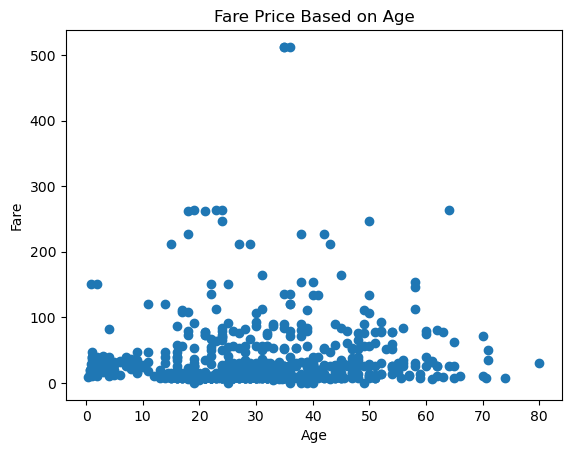

In [14]:
plt.scatter(x=train_titanic.Age, y=train_titanic.Fare)
plt.title("Fare Price Based on Age")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

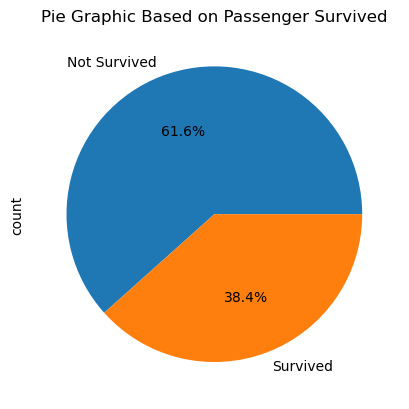

In [15]:
train_titanic.Survived.value_counts().plot(kind='pie', labels=['Not Survived','Survived'],autopct='%1.1f%%')
plt.title('Pie Graphic Based on Passenger Survived');

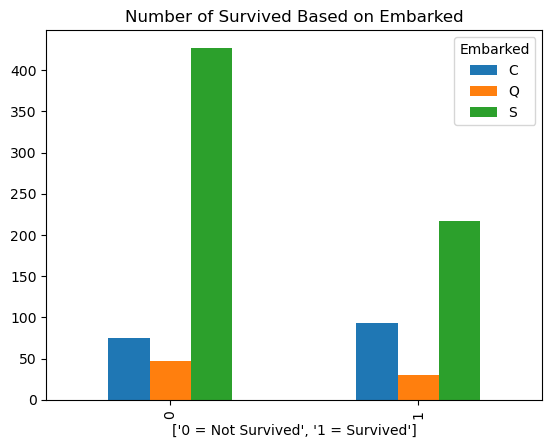

In [16]:
pd.crosstab(train_titanic.Survived, train_titanic.Embarked).plot(kind="bar")
plt.title("Number of Survived Based on Embarked")
plt.xlabel(['0 = Not Survived','1 = Survived']);

# Data Processing

In [17]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


#### First, let's copy our dataset so we don't have to manipulate the original data

In [18]:
titanic_copy = train_titanic.copy()
titanic_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### for a better performance in our Model, we will drop a few rows. 

In [19]:
from sklearn.preprocessing import OrdinalEncoder

def data_preprocessing(data):
    '''
    We will drop columns:

    PassengerId = it is a unique values for each passenger. This can confuse our model.
    Name = The name does not influence if the passenger will survive or not.
    Ticket =  it has a unique value in more the 76% of the dataset.
    Cabin = More the 77% of the values are unknown.
    '''
    data.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
    print(data.head())

    '''
    fill NaN age with median and round all values
    '''
    data.Age.fillna(data.Age.median(), inplace = True)
    data.Age.round().astype(int)

    '''
    tranform categorical data into numeric
    '''
    object_list = ['Sex','Embarked']
    ordinalEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99).fit(data[object_list])
    data[object_list] = ordinalEncoder.transform(data[object_list])

    return data

In [20]:
titanic_copy = data_preprocessing(titanic_copy)
titanic_copy.head()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


In [21]:
'''
drop the 2 lines in Embarked
'''
titanic_copy.dropna(inplace=True)

In [22]:
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    float64
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.5 KB


#### Split Train Validation data and normalize X data

In [23]:
# Separate variable and target columns
y= titanic_copy.Survived
X = titanic_copy.drop('Survived',axis=1)

In [24]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((711, 8), (711,), (178, 8), (178,))

# Apply Machine Learning

In [27]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "CatBoost": CatBoostClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "KNClassifier": KNeighborsClassifier()}

In [28]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [29]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

Learning rate set to 0.008906
0:	learn: 0.6871046	total: 142ms	remaining: 2m 22s
1:	learn: 0.6815395	total: 148ms	remaining: 1m 13s
2:	learn: 0.6755120	total: 151ms	remaining: 50.1s
3:	learn: 0.6701423	total: 152ms	remaining: 38s
4:	learn: 0.6644545	total: 154ms	remaining: 30.7s
5:	learn: 0.6591751	total: 156ms	remaining: 25.8s
6:	learn: 0.6536807	total: 157ms	remaining: 22.3s
7:	learn: 0.6483860	total: 158ms	remaining: 19.6s
8:	learn: 0.6441439	total: 159ms	remaining: 17.5s
9:	learn: 0.6386862	total: 161ms	remaining: 15.9s
10:	learn: 0.6337228	total: 162ms	remaining: 14.6s
11:	learn: 0.6288502	total: 163ms	remaining: 13.4s
12:	learn: 0.6251699	total: 164ms	remaining: 12.5s
13:	learn: 0.6226641	total: 165ms	remaining: 11.6s
14:	learn: 0.6179859	total: 167ms	remaining: 10.9s
15:	learn: 0.6139623	total: 168ms	remaining: 10.3s
16:	learn: 0.6097291	total: 170ms	remaining: 9.8s
17:	learn: 0.6057655	total: 171ms	remaining: 9.32s
18:	learn: 0.6015877	total: 172ms	remaining: 8.89s
19:	learn: 0

{'Logistic Regression': 0.7865168539325843,
 'KNN': 0.7808988764044944,
 'Random Forest': 0.7921348314606742,
 'XGBoost': 0.797752808988764,
 'CatBoost': 0.8033707865168539,
 'Gradient Boost Classifier': 0.8089887640449438,
 'Decision Tree Classifier': 0.7247191011235955,
 'KNClassifier': 0.7808988764044944}

#### Improve best score with GridSearchCV

##### Cat Boost

In [30]:
from sklearn.model_selection import cross_val_score, GridSearchCV

modelCBC = CatBoostClassifier()

parameter_val ={'n_estimators':[100],
                'max_depth': [3,5],
                'learning_rate':[0.1, 0.01, 0.001],
               }

grid = GridSearchCV(estimator= modelCBC,
                   param_grid= parameter_val,
                   cv=10)

grid.fit(X_train, y_train,verbose=0)

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020931884B90>,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5], 'n_estimators': [100]})

In [31]:
grid.best_score_

0.8326682316118935

In [32]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [33]:
modelCBC_tunned = CatBoostClassifier(n_estimators=100,
                                learning_rate=0.1,
                                max_depth = 5)

modelCBC_tunned.fit(X_train,y_train)

modelCBC_tunned_val_score = modelCBC_tunned.predict(X_val,verbose=0)

0:	learn: 0.6613817	total: 854us	remaining: 84.6ms
1:	learn: 0.6321877	total: 1.64ms	remaining: 80.2ms
2:	learn: 0.6042865	total: 2.24ms	remaining: 72.4ms
3:	learn: 0.5813727	total: 2.9ms	remaining: 69.6ms
4:	learn: 0.5608543	total: 3.55ms	remaining: 67.5ms
5:	learn: 0.5470465	total: 4.11ms	remaining: 64.4ms
6:	learn: 0.5323077	total: 4.91ms	remaining: 65.2ms
7:	learn: 0.5168553	total: 5.49ms	remaining: 63.2ms
8:	learn: 0.5054682	total: 6ms	remaining: 60.7ms
9:	learn: 0.4957215	total: 6.67ms	remaining: 60ms
10:	learn: 0.4865488	total: 7.26ms	remaining: 58.8ms
11:	learn: 0.4783870	total: 7.84ms	remaining: 57.5ms
12:	learn: 0.4701004	total: 8.46ms	remaining: 56.6ms
13:	learn: 0.4664235	total: 9.07ms	remaining: 55.7ms
14:	learn: 0.4585478	total: 9.68ms	remaining: 54.8ms
15:	learn: 0.4532871	total: 10.2ms	remaining: 53.7ms
16:	learn: 0.4471695	total: 10.8ms	remaining: 53ms
17:	learn: 0.4426342	total: 11.4ms	remaining: 52ms
18:	learn: 0.4373236	total: 12ms	remaining: 51.2ms
19:	learn: 0.432

In [34]:
modelCBC_tunned_val_score

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

##### Gradient Boosting Classifier

In [35]:
modelGBC = GradientBoostingClassifier()

parameter_val ={'n_estimators':[100],
                'max_depth': [3,5],
                'learning_rate':[0.1, 0.01, 0.001],
               }

grid = GridSearchCV(estimator= modelGBC,
                   param_grid= parameter_val,
                   cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5], 'n_estimators': [100]})

In [36]:
grid.best_score_

0.8228090766823162

In [37]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [38]:
modelGBC_tunned = CatBoostClassifier(n_estimators=100,
                                learning_rate=0.01,
                                max_depth = 3)

modelGBC_tunned.fit(X_train,y_train)

modelGBC_tunned_val_score = modelGBC_tunned.predict(X_val,verbose=0)

0:	learn: 0.6894916	total: 938us	remaining: 92.9ms
1:	learn: 0.6858553	total: 2.13ms	remaining: 104ms
2:	learn: 0.6822714	total: 3.38ms	remaining: 109ms
3:	learn: 0.6786580	total: 4.09ms	remaining: 98.2ms
4:	learn: 0.6757331	total: 4.66ms	remaining: 88.5ms
5:	learn: 0.6722356	total: 5.15ms	remaining: 80.7ms
6:	learn: 0.6691320	total: 5.86ms	remaining: 77.9ms
7:	learn: 0.6658188	total: 6.63ms	remaining: 76.3ms
8:	learn: 0.6624861	total: 7.25ms	remaining: 73.3ms
9:	learn: 0.6592272	total: 7.8ms	remaining: 70.2ms
10:	learn: 0.6560233	total: 8.31ms	remaining: 67.2ms
11:	learn: 0.6530717	total: 8.86ms	remaining: 65ms
12:	learn: 0.6501869	total: 9.32ms	remaining: 62.4ms
13:	learn: 0.6476498	total: 9.81ms	remaining: 60.3ms
14:	learn: 0.6449859	total: 10.4ms	remaining: 58.8ms
15:	learn: 0.6420364	total: 10.9ms	remaining: 57.2ms
16:	learn: 0.6389933	total: 11.3ms	remaining: 55.4ms
17:	learn: 0.6365309	total: 11.8ms	remaining: 53.7ms
18:	learn: 0.6337399	total: 12.2ms	remaining: 52.2ms
19:	learn

In [39]:
modelGBC_tunned_val_score

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

# Metrics

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, modelCBC_tunned_val_score)

array([[93, 16],
       [18, 51]], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, modelGBC_tunned_val_score)

array([[91, 18],
       [17, 52]], dtype=int64)

# Predict test_titanic

In [42]:
test_titanic_copy = test_titanic.copy()
test_titanic_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
test_titanic_copy = data_preprocessing(test_titanic_copy)

print(f'\nThe Length is: ',len(test_titanic_copy))

test_titanic_copy.head()

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S

The Length is:  418


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1.0,34.5,0,0,7.8292,1.0
1,893,3,0.0,47.0,1,0,7.0000,2.0
2,894,2,1.0,62.0,0,0,9.6875,1.0
3,895,3,1.0,27.0,0,0,8.6625,2.0
4,896,3,0.0,22.0,1,1,12.2875,2.0


In [44]:
test_titanic_scaler = scaler.fit_transform(test_titanic_copy)
len(test_titanic_scaler)

418

#### CatBoostingClassifier

In [45]:
predict_test_titanic_CBC = modelCBC_tunned.predict(test_titanic_scaler)

In [46]:
predict_test_titanic_CBC.shape

(418,)

In [47]:
print(predict_test_titanic_CBC)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [48]:
true_values = gender_sub['Survived']
true_values

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [63]:
from sklearn.metrics import classification_report

table = pd.DataFrame(true_values, predict_test_titanic_CBC,columns=['True_values','predict_test_titanic_CBC'])
print('Confusion Matrix\n', confusion_matrix(true_values,predict_test_titanic_CBC))

print("\n",classification_report(true_values,predict_test_titanic_CBC))

print('Accuracy CatBoostClassifier: ', np.mean(np.equal(true_values, predict_test_titanic_CBC)))

Confusion Matrix
 [[251  15]
 [ 27 125]]

               precision    recall  f1-score   support

           0       0.90      0.94      0.92       266
           1       0.89      0.82      0.86       152

    accuracy                           0.90       418
   macro avg       0.90      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418

Accuracy CatBoostClassifier:  0.8995215311004785


#### GradientBoostingClassifier

In [50]:
predict_test_titanic_GBC = modelGBC_tunned.predict(test_titanic_scaler)

In [51]:
print(predict_test_titanic_GBC)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [64]:
from sklearn.metrics import classification_report

table = pd.DataFrame(true_values, predict_test_titanic_GBC,columns=['True_values','predict_test_titanic_GBC'])
print('Confusion Matrix\n', confusion_matrix(true_values,predict_test_titanic_GBC))

print("\n",classification_report(true_values,predict_test_titanic_GBC))

print('Accuracy GradientBoostingClassifier: ', np.mean(np.equal(true_values, predict_test_titanic_GBC)))

Confusion Matrix
 [[266   0]
 [  3 149]]

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.98      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

Accuracy GradientBoostingClassifier:  0.992822966507177


# Creating Dataframe to compar the prediction with kaggle results.

In [53]:
compare_table = pd.DataFrame()
compare_table['predict_test_titanic_GBC'] = predict_test_titanic_GBC
compare_table['PassengerId_Prediction']= test_titanic['PassengerId'].astype('int')
compare_table['True_values'] = gender_sub['Survived']
compare_table['PassengerId_values']=gender_sub['PassengerId']
compare_table

,predict_test_titanic_GBC,PassengerId_Prediction,True_values,PassengerId_values
0,0,892,0,892
1,1,893,1,893
2,0,894,0,894
3,0,895,0,895
4,1,896,1,896
...,...,...,...,...
413,0,1305,0,1305
414,1,1306,1,1306
415,0,1307,0,1307
416,0,1308,0,1308


In [54]:
compare_table['predict_test_titanic_GBC'].value_counts()

predict_test_titanic_GBC
0    269
1    149
Name: count, dtype: int64

In [55]:
compare_table['True_values'].value_counts()

True_values
0    266
1    152
Name: count, dtype: int64

In [56]:
submission = pd.DataFrame(compare_table,columns=['PassengerId_Prediction','predict_test_titanic_GBC'])
submission

,PassengerId_Prediction,predict_test_titanic_GBC
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
submission = submission.rename(columns={'PassengerId_Prediction': 'PassengerId', 'predict_test_titanic_GBC':'Survived'})

In [58]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
submission.to_csv("submission.csv",index=False)